![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

Ideias e funções: Luan Lima \& Bernardo Costa

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Calculando o mínimo de uma função

Encontrar o mínimo de uma função derivável é (quase) equivalente a resolver a equação $f'(x) = 0$.

Vamos explorar algumas destas ideias.

# 1: Funções básicas

## Métodos de bisseção e Newton

In [2]:
def bissecao_step(f,a,b):
    z = (a+b)/2
    if f(a)*f(z)<0:
        b=z
    else:
        a=z
    return a,b
def bissecao_pts(f, a, b, xtol=1e-8, ytol=1e-8):
    """
    Encontra uma raiz de  f  pelo algoritmo da bissecao, retornando
    todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do intervalo ficar menor do que  xtol,
    ou quando o valor absoluto da função ficar abaixo de  ytol.
    """
    pts=[a, b]
    while True:
        z=(a+b)/2
        pts.append(z)
        if abs(f(z))<ytol or abs(b-a)<xtol:
            break
        a,b = bissecao_step(f, a, b)
    return pts
    

In [3]:
def newton_pts(f, df, x, xtol=1e-8, ytol=1e-8, maxiter=100):
    """
    Método de Newton para encontrar uma raiz de  f  a partir do valor inicial  x.
    Retorna todos os pontos pelos quais o algoritmo passa.
    
    O algoritmo termina quando o tamanho do passo é menor do que  xtol,
    quando o valor absoluto da função ficar abaixo de  ytol,
    ou após  maxiter  iterações.
    """
    l=[x]
    for i in range(maxiter):
        passo = f(x)/df(x)
        newx= x-passo
        l.append(newx)
        if abs(passo) < xtol or abs(f(newx)) < ytol:
            return l
        x=newx
    return l

## Derivadas numéricas

Dê, abaixo, as funções para calcular a primeira e a segunda derivadas numéricas.

In [4]:
def df_central(f, x, h=1e-5):
    """Derivada central de  f  em  x, com passo  h"""
    return (f(x+h) - f(x-h))/(2*h)
def ddf_central(f,x, h=1e-4):
    """Aproximação da segunda derivada de  f  em  x, usando a derivada central iterada com passo  h."""
    return (df_central(f,x+h)-df_central(f,x-h))/(2*h)

## Erro de aproximação da derivada central iterada

Varie $h$ no intervalo $[2^{-27}, 2^0]$,
e faça um gráfico do erro da derivada central iterada para derivada segunda,
para a exponencial em $x = 0$.

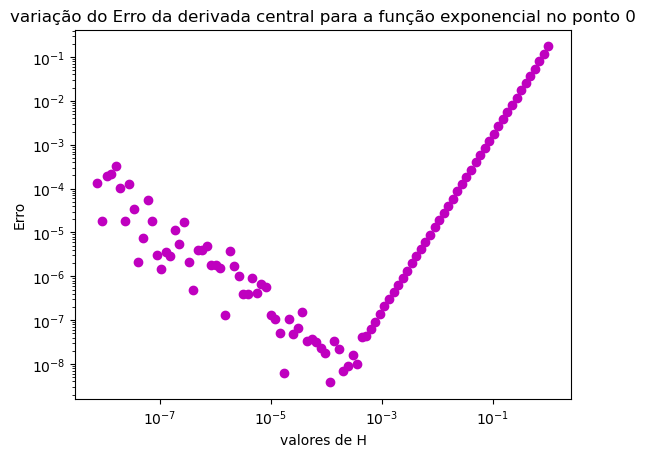

In [31]:
hs = np.logspace(-27,0,base=2, num=100)
erro=ddf_central(np.exp,0,hs)-np.exp(0)
plt.loglog(hs,abs(erro),'mo')
plt.title('variação do Erro da derivada central para a função exponencial no ponto 0')
plt.xlabel("valores de H")
plt.ylabel("Erro")
ax = plt.gca()

In [6]:
assert len(ax.lines) == 1
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

Como esse gráfico muda se escolhermos outros pontos no intervalo $[-2,2]$?
- Use erros relativos; e
- faça várias curvas no mesmo gráfico.

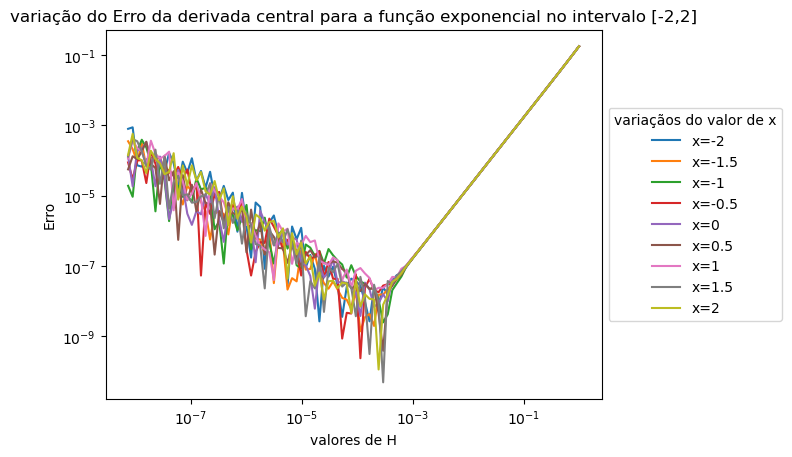

In [7]:
hs = np.logspace(-27,0,base=2, num=100)

erro=(ddf_central(np.exp,-2,hs)-np.exp(-2))/np.exp(-2)
erro1=(ddf_central(np.exp,-1.5,hs)-np.exp(-1.5))/np.exp(-1.5)
erro2=(ddf_central(np.exp,-1,hs)-np.exp(-1))/np.exp(-1)
erro3=(ddf_central(np.exp,-0.5,hs)-np.exp(-0.5))/np.exp(-0.5)
erro4=(ddf_central(np.exp,0,hs)-np.exp(0))/np.exp(0)
erro5=(ddf_central(np.exp,0.5,hs)-np.exp(0.5))/np.exp(0.5)
erro6=(ddf_central(np.exp,1,hs)-np.exp(1))/np.exp(1)
erro7=(ddf_central(np.exp,1.5,hs)-np.exp(1.5))/np.exp(1.5)
erro8=(ddf_central(np.exp,2,hs)-np.exp(2))/np.exp(2)
plt.loglog(hs,abs(erro),label='x=-2')
plt.loglog(hs,abs(erro1),label='x=-1.5')
plt.loglog(hs,abs(erro2),label='x=-1')
plt.loglog(hs,abs(erro3),label='x=-0.5')
plt.loglog(hs,abs(erro4),label='x=0')
plt.loglog(hs,abs(erro5),label='x=0.5')
plt.loglog(hs,abs(erro6),label='x=1')
plt.loglog(hs,abs(erro7),label='x=1.5')
plt.loglog(hs,abs(erro8),label='x=2')
plt.title('variação do Erro da derivada central para a função exponencial no intervalo [-2,2]')
plt.legend(title="variaçãos do valor de x", bbox_to_anchor=(1,0.5), loc="center left")
plt.xlabel("valores de H")
plt.ylabel("Erro")
ax = plt.gca()

In [8]:
assert len(ax.lines) >= 8
assert len(ax.title.get_text()) > 10
assert ax.get_xlabel() != ""

Comente.

Quanto menor o valor de H mais os erros variam desordenadamente por conta do truncamento, porém pouco após a segunda metade os valores são relativamente constantes. 
Observa-se também que o intervalo ideal para H é $10^-4<h<10^-3$

# 2: Um problema modelo

Vamos minimizar a função $f(x) = e^x - 2x$.

In [9]:
def f(x):
    return np.exp(x) - 2*x

## Preparando a bisseção

Escreva 3 funções:
- a derivada analítica $g_1(x) = f'(x)$
- a derivada central $g_2(x)$ com passo `h = 1e-3`
- a derivada central $g_2(x)$ com passo `h = 1e-5`

In [10]:
def g1(x):
    return np.exp(x)-2
def g2(x):
    return df_central(f,x,1e-3)
def g3(x):
    return df_central(f,x,1e-5)

In [11]:
np.random.seed(41)
for x in np.random.rand(10):
    assert np.isclose(g1(x), g2(x)), x
    assert np.isclose(g1(x), g3(x)), x

Faça o gráfico de $f(x)$ e determine um intervalo para fazer bisseção para encontrar um zero da derivada.

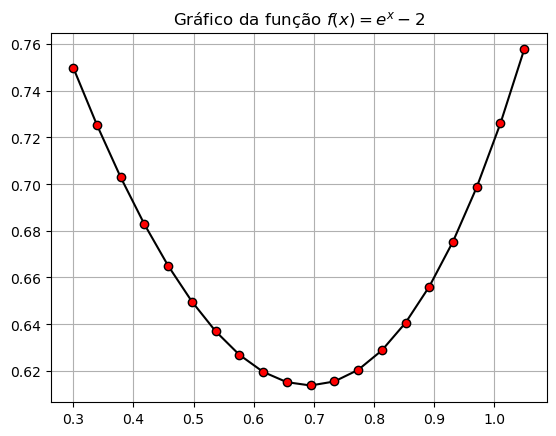

In [12]:
x=np.linspace(0.3,1.05,20)
y=f(x)
plt.plot(x, y, color='black', linestyle='solid',marker='o', markerfacecolor="red")
plt.title("Gráfico da função $f(x)=e^x-2$")
plt.grid()
ax = plt.gca()

In [13]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

Qual intervalo você escolheria?
Porquê?

graficamente percebemos que a raiz da função está entre 0.6 e 0.8. Pois o zero da derivada é no ponto de inflexão da função.

## Gráficos da bisseção

Aplique o método da bisseção usando $g_1$, $g_2$ e $g_3$ para encontrar uma raiz de $f$.

Faça um gráfico mostrando como evolui (ao longo das iterações)
a distância do ponto considerado até a raiz ($\log(2)$),
para cada um dos métodos.

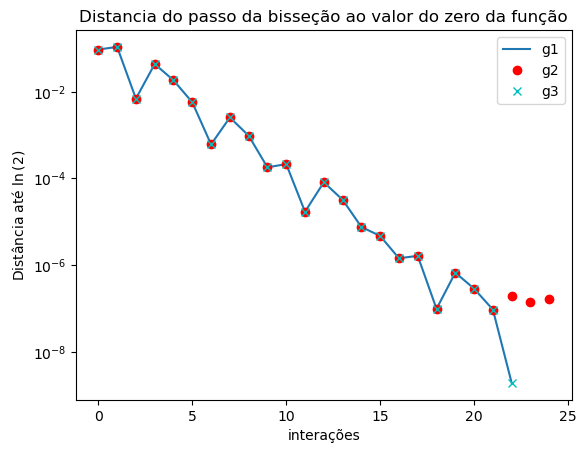

In [14]:
y=abs(bissecao_pts(g1,0.6,0.8)-np.log(2))
y1=abs(bissecao_pts(g2,0.6,0.8)-np.log(2))
y2=abs(bissecao_pts(g3,0.6,0.8)-np.log(2))
plt.semilogy(y,label='g1')
plt.semilogy(y1,'ro',label='g2')
plt.semilogy(y2,'cx',label='g3')
plt.xlabel("interações")
plt.ylabel('Distância até $\ln{(2)}$')
plt.legend()
plt.title('Distancia do passo da bisseção ao valor do zero da função')
ax = plt.gca()

In [15]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

O que você vê no gráfico acima?
Como você explica?

Até um pouco mais que 20 interações a distancia até a raiz se mantém igual, porém depois disso a bisseção com a primeira derivada central começa a se manter numa distancia de $10^-6$ da raiz, ou seja, pelo metodo da bisseção usar a primeira derivada central não é o melhor caminho, porém a segunda derivada central e a derivada analitica convergem para o mesmo valor que é o mais proximo da raiz real pela tolerancia padrão.

## Newton

Para usar o método de Newton, será necessário usarmos mais uma derivada numérica.

Implemente
- $h_1(x)$, a segunda derivada analítica, e
- $h_2(x)$ a derivada numérica (que pode ser obtida a partir de `ddf_central`).

In [16]:
def h1(x):
    return np.exp(x)
def h2(x):
    return ddf_central(f,x)

In [17]:
np.random.seed(41)
for x in np.random.randn(10):
    assert np.isclose(h1(x), h2(x)), x

Agora, aplique o método de Newton (com tolerâncias padrão):
- com ambas as derivadas analíticas
- com a primeira derivada analítica, e a segunda numérica
- com ambas as derivadas numéricas (use a "melhor" derivada central que você puder).

Faça, como no caso da bisseção, o gráfico da distância até a mínimo da função.

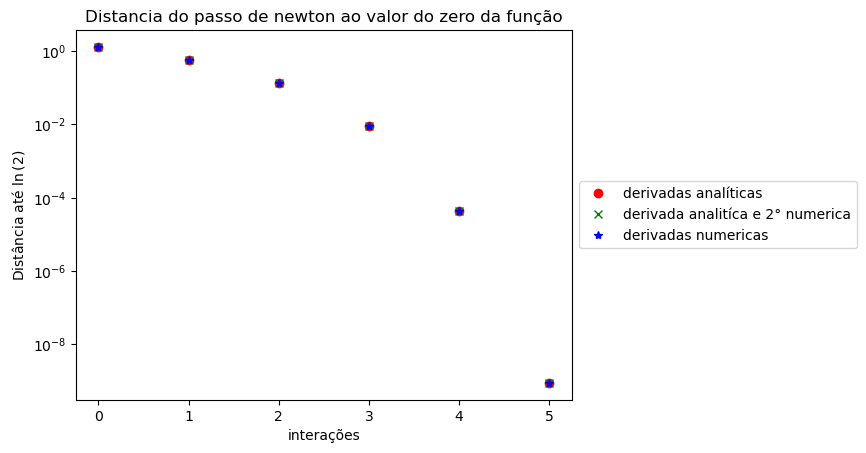

In [18]:
y1=abs(newton_pts(g1,h1,2)-np.log(2))
y2=abs(newton_pts(g1,h2,2)-np.log(2))
y3=abs(newton_pts(g3,h2,2)-np.log(2))
plt.semilogy(y1,'ro',label='derivadas analíticas')
plt.semilogy(y2,'gx',label='derivada analitíca e 2° numerica')
plt.semilogy(y3,'b*',label='derivadas numericas')
plt.xlabel("interações")
plt.ylabel('Distância até $\ln{(2)}$')
plt.legend(title="", bbox_to_anchor=(1,0.5), loc="center left")
plt.title('Distancia do passo de newton ao valor do zero da função')
ax = plt.gca()

In [19]:
assert len(ax.lines) == 3
assert len(ax.legend().texts) == 3
assert ax.title.get_text() != ""
assert ax.get_xlabel() != ""

Agora, reduza ambas as tolerâncias do método para `1e-15`, e refaça os gráficos.

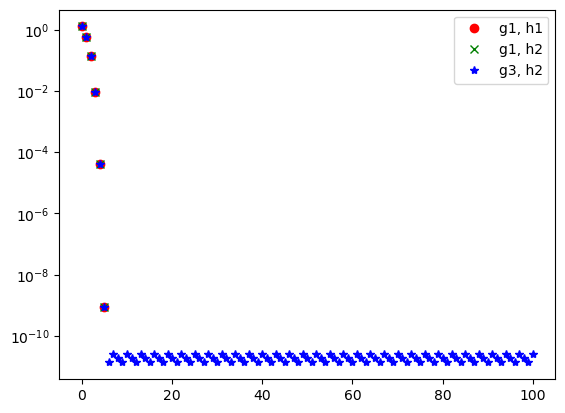

In [20]:
y1=abs(newton_pts(g1,h1,2,1e-15,1e-15)-np.log(2))
y2=abs(newton_pts(g1,h2,2,1e-15,1e-15)-np.log(2))
y3=abs(newton_pts(g3,h2,2,1e-15,1e-15)-np.log(2))
plt.semilogy(y1,'ro', label = 'g1, h1')
plt.semilogy(y2,'gx', label = 'g1, h2')
plt.semilogy(y3,'b*', label = 'g3, h2')
plt.legend()

Deveria haver (pelo menos) duas diferenças entre este gráfico e o anterior.

- Quais você observa?
- Como você as explica?

Ambas as 3 funções atingem valores identicos, a unica diferença perceptiva é que a segunda derivada central com a segunda derivada analitica entra em loop logo apos passarem pela tolerancia padrão.

# 3: O mesmo problema, mais complicado

Queremos achar o mínimo da função $$ f(x) = e^{x^2-2x+1}-2^{x^3-6x+12} $$
no intervalo $[-2,2]$.

Defina $f$, e faça um gráfico para encontrar um intervalo para bisseção e um ponto inicial para Newton.

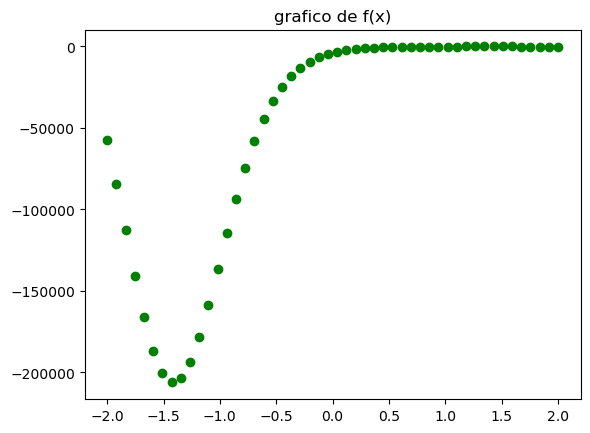

In [21]:
def f(x):
    return np.exp(x**2-2*x+1)-2**(x**3-6*x+12)
x=np.linspace(-2,2)
y=f(x)
plt.plot(x,y,'go')
plt.title('grafico de f(x)')
ax = plt.gca()

In [22]:
assert len(ax.lines) == 1
assert ax.title.get_text() != ""

yvals = ax.lines[0].get_ydata()
assert min(yvals) <= -20000
assert np.all(yvals <= 0)

Defina a derivada (analítica) de f:

In [23]:
def g1(x):
    return 2*(np.exp((x-1)**2)*(x-1))-3*(2**((x**3)-6*x+12))*((x**2)-2)*np.log(2)

In [24]:
np.random.seed(2022)
for x in np.random.randn(10):
    assert np.isclose(g1(x), df_central(f, x), rtol=1e-8)

Calcule a raiz exata (a menos da precisão) do computador,
aplicando o método da bisseção à derivada analítica de $f$.

In [25]:
l=bissecao_pts(g1,-1.5,-1,1e-15,1e-15)
f(l[-1])

-206314.77303578638

Calcule o valor de $f$ nos pontos obtidos.
Em qual/quais deles ocorreu o mínimo?

In [26]:
y=[]
for x in l:
    y.append(f(x))
m=min(y)
print(f"lista dos valores de f: {y}")
print(f"Valor minimo de f: {m}")

lista dos valores de f: [-201622.64448320126, -131017.40184996686, -191327.43213335058, -205448.07103413306, -205941.94199760057, -206288.00613773827, -206265.11269190558, -206313.90682410283, -206310.26558091943, -206314.41713841594, -206314.74515612988, -206314.72688662744, -206314.77246305952, -206314.7679208661, -206314.77246967447, -206314.77303578157, -206314.77289508333, -206314.7730010209, -206314.77302729868, -206314.77303376424, -206314.77303532895, -206314.77303569415, -206314.77303577273, -206314.77303578562, -206314.77303578565, -206314.77303578667, -206314.77303578614, -206314.7730357864, -206314.7730357863, -206314.7730357865, -206314.77303578655, -206314.7730357861, -206314.77303578635, -206314.7730357865, -206314.77303578667, -206314.77303578623, -206314.77303578646, -206314.7730357866, -206314.77303578626, -206314.77303578638, -206314.77303578632, -206314.77303578658, -206314.7730357862, -206314.7730357864, -206314.77303578632, -206314.77303578635, -206314.77303578638

Qual a distância deste ponto ao último ponto produzido pela bisseção?

In [27]:
abs(m-f(l[-1]))

2.9103830456733704e-10

O que você acha que aconteceu?

o valor minimo da derivada analitica é um pouco diferente do valor de f, pela forma como o python calcula a bisseção. Já que a derivada de uma função possui valores diferentes para cada valor de X.

Agora, compare o erro com o método da bisseção e o de Newton, usando as derivadas numéricas.

Como sugerem as contas acima, aqui há vários problemas de precisão numérica.
Assim, tente botar tolerâncias pequenas, mas não pequenas demais para seus métodos.

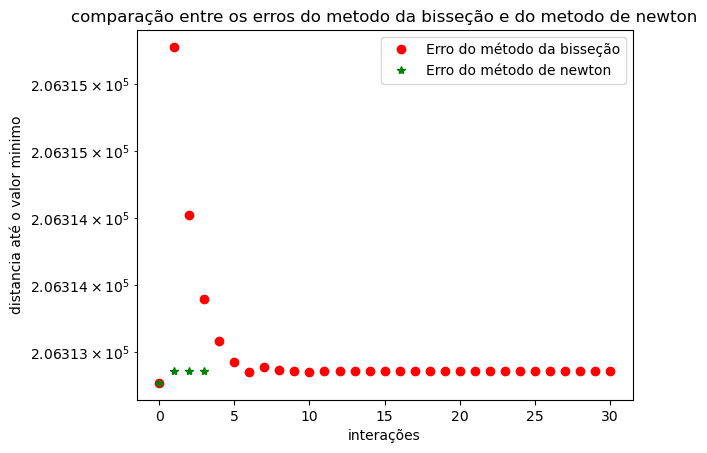

In [28]:
def dc1(x):
    return df_central(f,x)
def dc2(x):
    return ddf_central(f,x)
Errobiss= np.array(bissecao_pts(dc1,-1.5,1))-min(y)
Erronew= np.array(newton_pts(dc1,dc2,-1.5))-min(y)
plt.semilogy(abs(Errobiss),'ro',label='Erro do método da bisseção')
plt.semilogy(abs(Erronew),'g*',label='Erro do método de newton')
plt.title("comparação entre os erros do metodo da bisseção e do metodo de newton")
plt.xlabel("interações")
plt.ylabel("distancia até o valor minimo")
plt.legend()
ax = plt.gca()

In [29]:
assert len(ax.lines) == 2
assert len(ax.get_legend().texts) == 2

In [30]:
for l in ax.lines:
    ys = l.get_ydata()
    assert min(abs(ys)) < 1e-8

AssertionError: 